In [1]:
import pandas as pd


In [2]:
wine_data = pd.read_csv("winequality-red.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
def preprocess_data(data, target_column):
    X = data.drop(columns=[target_column])
    y = data[target_column]

    numerical_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_transformer = SimpleImputer(strategy='mean')
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)

    return X_train_preprocessed, X_test_preprocessed, y_train, y_test

In [11]:
X_train_preprocessed, X_test_preprocessed, y_train, y_test = preprocess_data(wine_data, 'quality')

        

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [13]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [14]:
dt_classifier.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = dt_classifier.predict(X_test_preprocessed)
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

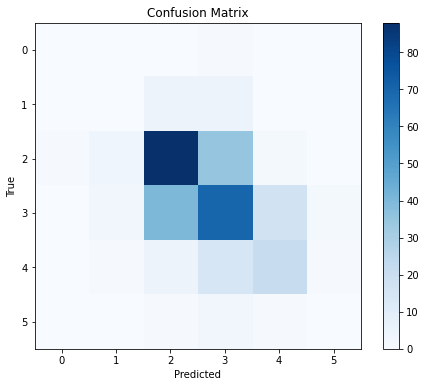

In [17]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

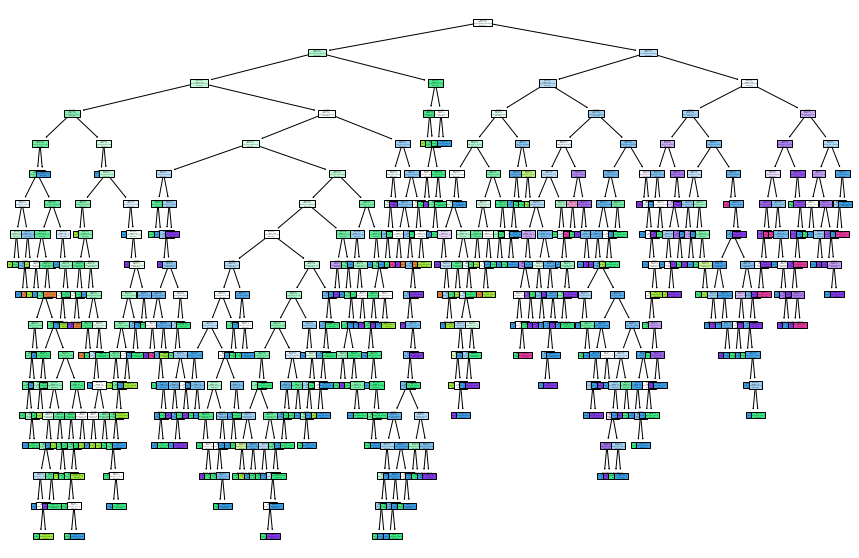

In [21]:
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=range(X_train_preprocessed.shape[1]), class_names=True)
plt.show()


In [24]:
print("Accuracy Score:", acc_score)

Accuracy Score: 0.559375
